# Naver Clova Face Recognition

## 유명인 얼굴 인식

In [3]:
import os
import sys
import requests
client_id = ""
client_secret = ""
# url = "https://openapi.naver.com/v1/vision/face" // 얼굴감지
url = "https://openapi.naver.com/v1/vision/celebrity" # 유명인 얼굴인식
files = {'image': open('IU.jpg', 'rb')}
headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret': client_secret }
response = requests.post(url,  files=files, headers=headers)
rescode = response.status_code
if(rescode==200):
    print (response.text)
else:
    print("Error Code:" + rescode)

{"info":{"size":{"width":1161,"height":1920},"faceCount":1},"faces":[{"celebrity":{"value":"전효성","confidence":0.347973}}]}


## 얼굴 감지

In [5]:
import os
import sys
import requests
client_id = ""
client_secret = ""
url = "https://openapi.naver.com/v1/vision/face" # 얼굴감지
# url = "https://openapi.naver.com/v1/vision/celebrity" # 유명인 얼굴인식
files = {'image': open('IU.jpg', 'rb')}
headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret': client_secret }
response = requests.post(url,  files=files, headers=headers)
rescode = response.status_code
if(rescode==200):
    print (response.text)
else:
    print("Error Code:" + rescode)

{"info":{"size":{"width":1161,"height":1920},"faceCount":1},"faces":[{"roi":{"x":447,"y":562,"width":554,"height":554},"landmark":null,"gender":{"value":"female","confidence":0.999838},"age":{"value":"19~23","confidence":1.0},"emotion":{"value":"neutral","confidence":0.999996},"pose":{"value":"right_face","confidence":0.921038}}]}


In [8]:
import json

json_data = json.loads(response.text)
json_data

{'info': {'size': {'width': 1161, 'height': 1920}, 'faceCount': 1},
 'faces': [{'roi': {'x': 447, 'y': 562, 'width': 554, 'height': 554},
   'landmark': None,
   'gender': {'value': 'female', 'confidence': 0.999838},
   'age': {'value': '19~23', 'confidence': 1.0},
   'emotion': {'value': 'neutral', 'confidence': 0.999996},
   'pose': {'value': 'right_face', 'confidence': 0.921038}}]}

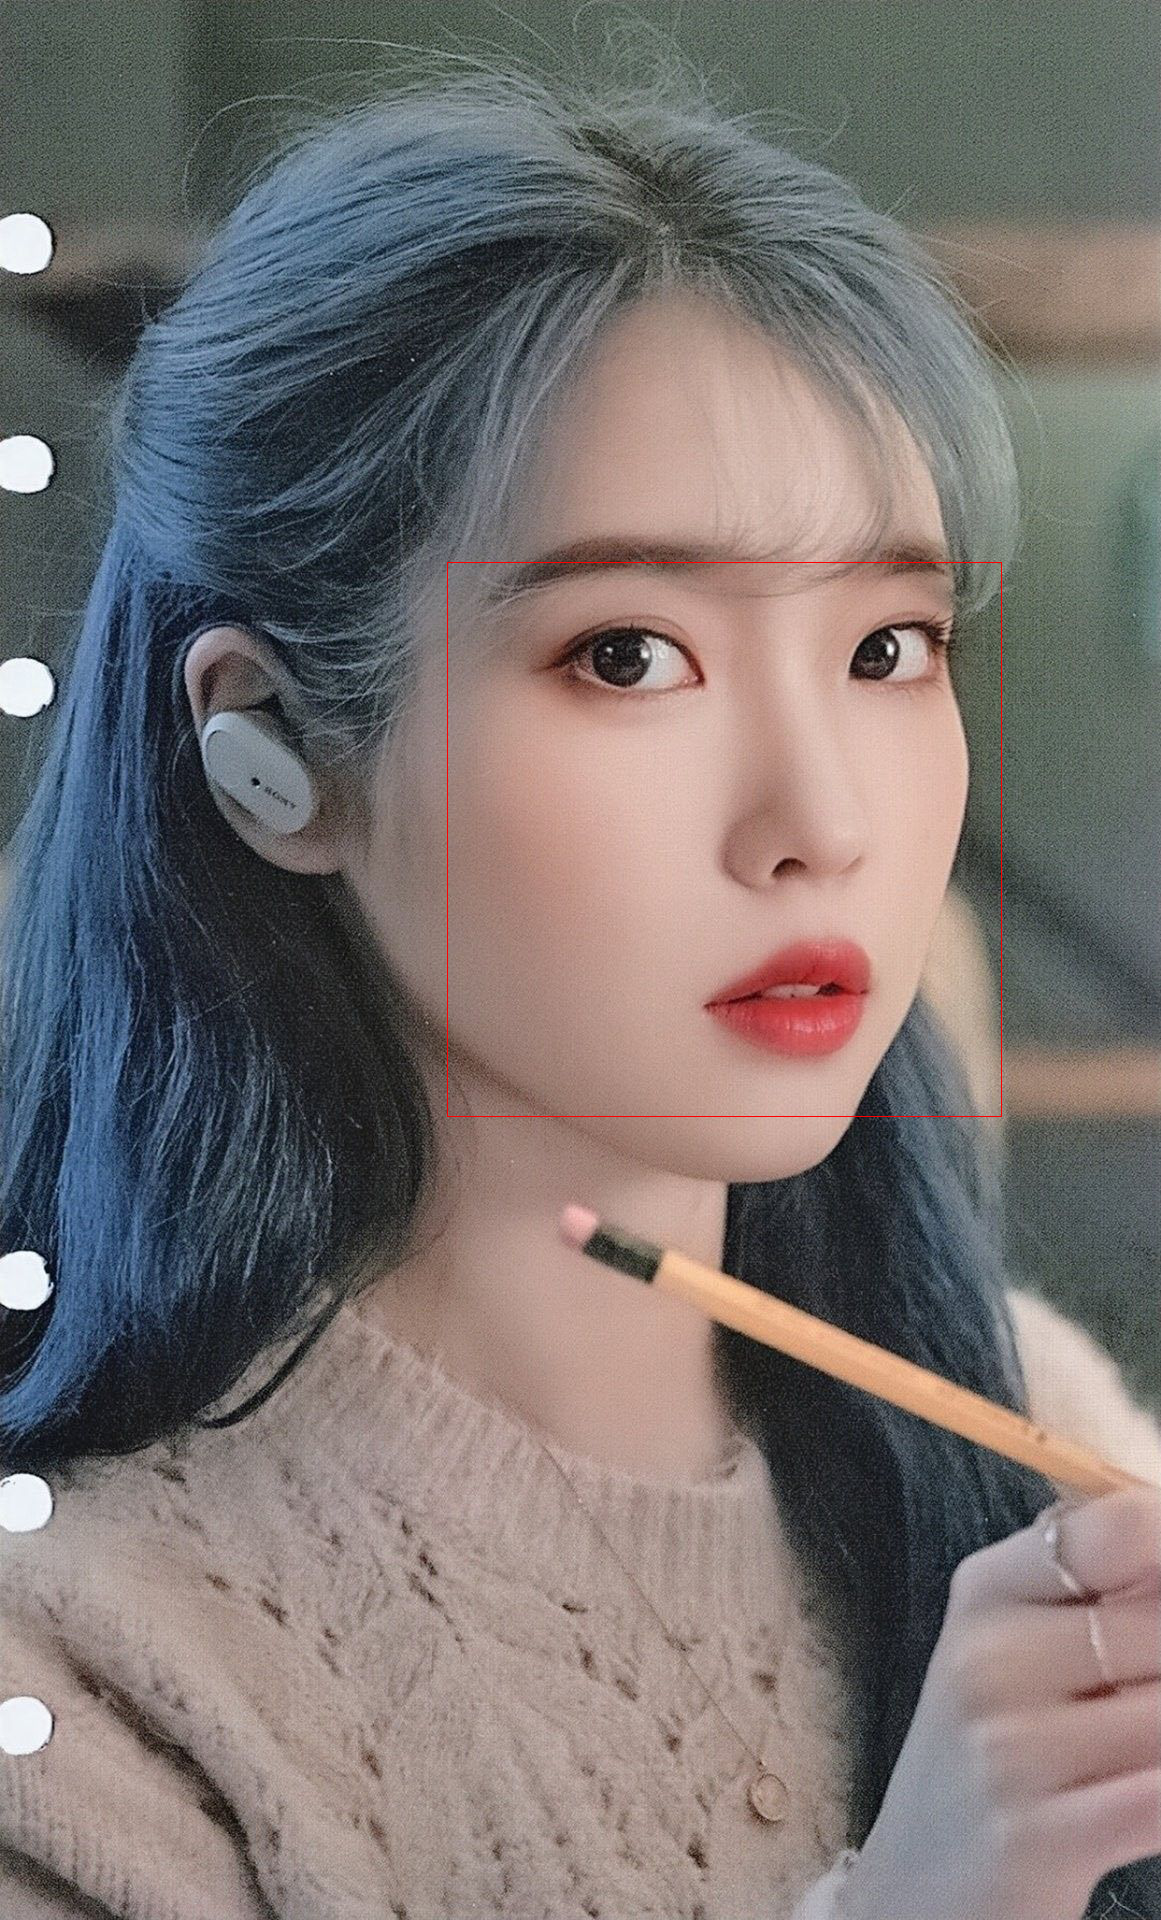

In [14]:
from PIL import Image, ImageDraw

x, y, w, h = json_data['faces'][0]['roi'].values()

target_image = Image.open('IU.jpg')
draw = ImageDraw.Draw(target_image)
draw.rectangle(((x,y), (x+w,y+h)), outline="red")
target_image

In [16]:
gender, gen_confidence = json_data['faces'][0]['gender'].values() # 성별
age, age_confidence = json_data['faces'][0]['age'].values() # 나이
emotion, emotion_confidence = json_data['faces'][0]['emotion'].values() # 감정
pose, pose_confidence = json_data['faces'][0]['pose'].values() # 얼굴 방향

result = """
성별: %s (%s)
나이: %s (%s)
감정: %s (%s)
방향: %s (%s)
""" % (
    gender, gen_confidence,
    age, age_confidence,
    emotion, emotion_confidence,
    pose, pose_confidence
)
print(result)


성별: female (0.999838)
나이: 19~23 (1.0)
감정: neutral (0.999996)
방향: right_face (0.921038)



# 참고
### https://steemit.com/kr/@anpigon/openapi-naver-vision-face
### https://pinkwink.kr/1136